In [4]:
!pip install -q -U watermark

In [5]:
%reload_ext watermark
%watermark -a "Gabriel Delucca"

Author: Gabriel Delucca



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [7]:
df_dados_originais = pd.read_csv('dataset.csv')

In [8]:
type(df_dados_originais)

pandas.core.frame.DataFrame

In [9]:
df_dados_originais.shape

(500, 5)

In [10]:
df_dados_originais.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [11]:
df_dados_originais.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [12]:
df_dados_originais.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
494,22,12900.989255,Masculino,Médio,67.0
37,26,6929.056936,Outro,Fundamental,37.0
341,52,31470.957592,Outro,Fundamental,56.0
157,41,23848.362744,Outro,Fundamental,45.0
70,33,18113.592802,Masculino,Médio,73.0
407,58,27452.267803,Masculino,Fundamental,49.0
140,32,21292.122434,Feminino,Superior,89.0
15,22,14051.851327,Masculino,Fundamental,51.0
240,26,14298.612509,Feminino,Médio,58.0
311,57,30386.502465,Masculino,Fundamental,30.0


In [13]:
df_dados_originais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


# Análise Exploratória de Dados

In [14]:
df_dados_originais.describe(include= object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [15]:
df_dados_originais.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


# Visualizando a Distribuição de Variáveis Quantitativas

In [16]:
df_dados_originais.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [17]:
colunas_selecionadas = [list(df_dados_originais.columns.values)[i] for i in [0, 1, 4]]

In [18]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

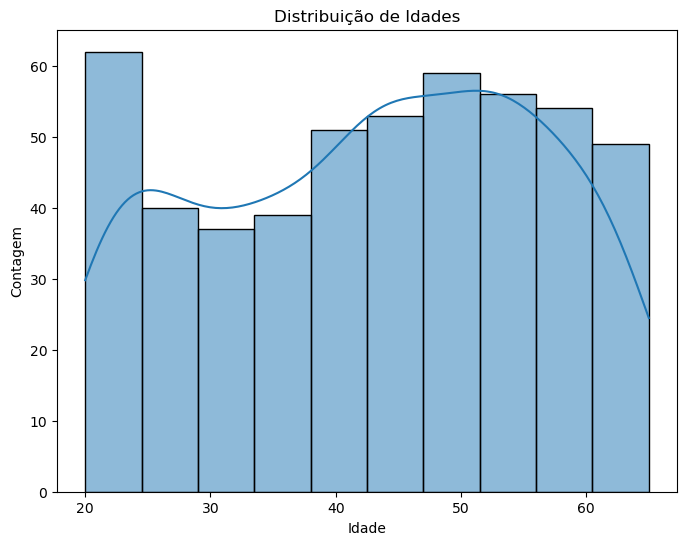

In [19]:
# Histograma Distribuição de idades

plt.figure(figsize = (8, 6))
sns.histplot(df_dados_originais['Idade'], kde = True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

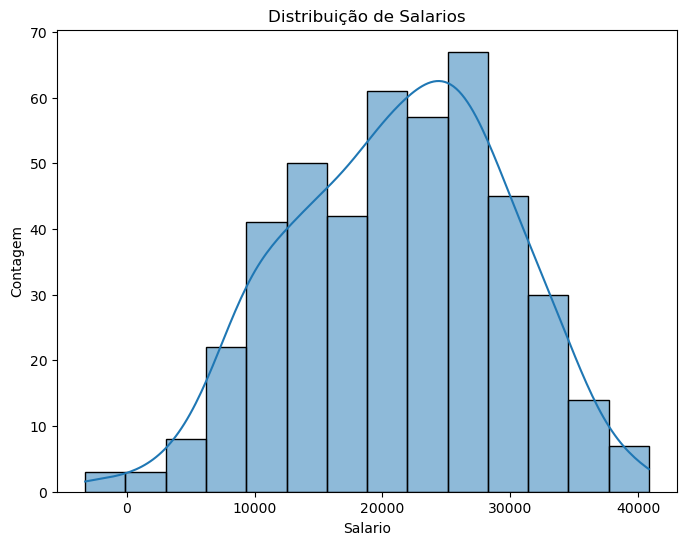

In [20]:
# Histograma Distribuição de salários

plt.figure(figsize = (8, 6))
sns.histplot(df_dados_originais['Salario'], kde = True)
plt.title('Distribuição de Salarios')
plt.xlabel('Salario')
plt.ylabel('Contagem')
plt.show()

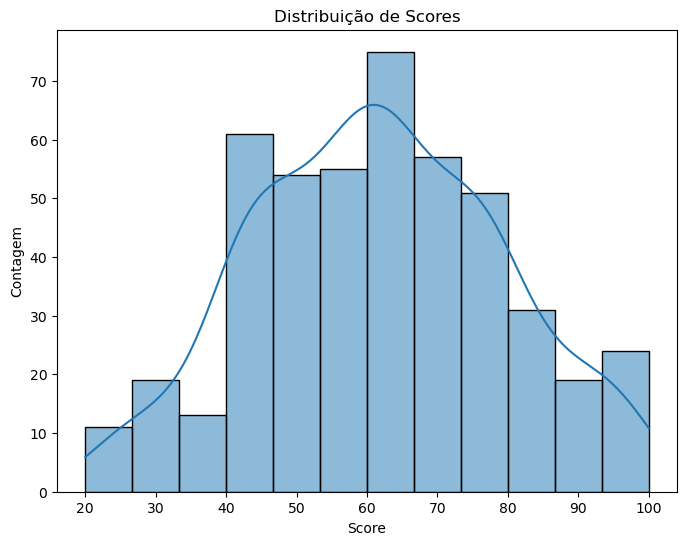

In [21]:
# Histograma Distribuição de Scores
plt.figure(figsize = (8, 6))
sns.histplot(df_dados_originais['Score_Exame_Psicotecnico'], kde = True)
plt.title('Distribuição de Scores')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

# Visualizando a Distribuição de Variáveis Qualitativas/ Categóricas

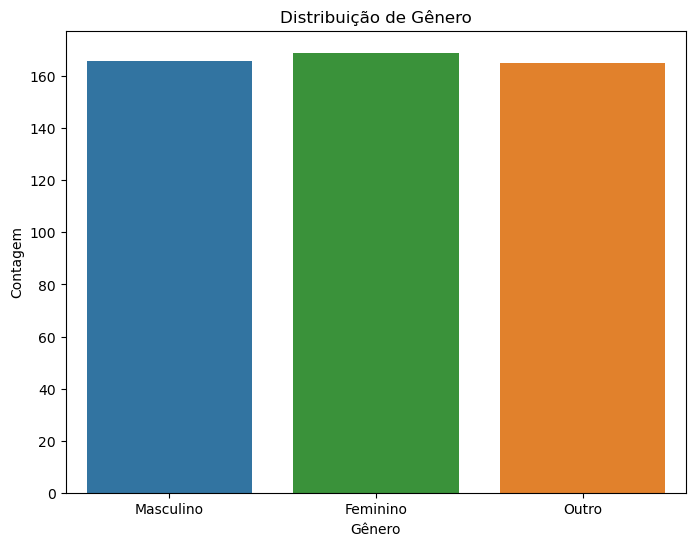

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Especificar manualmente as cores azul, verde e laranja
cores = ["#1f77b4", "#2ca02c", "#ff7f0e"]

# Distribuição de Gênero
plt.figure(figsize=(8, 6))
sns.countplot(data=df_dados_originais, x='Genero', hue='Genero', palette=cores, legend=False)
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()


Text(0, 0.5, 'Contagem')

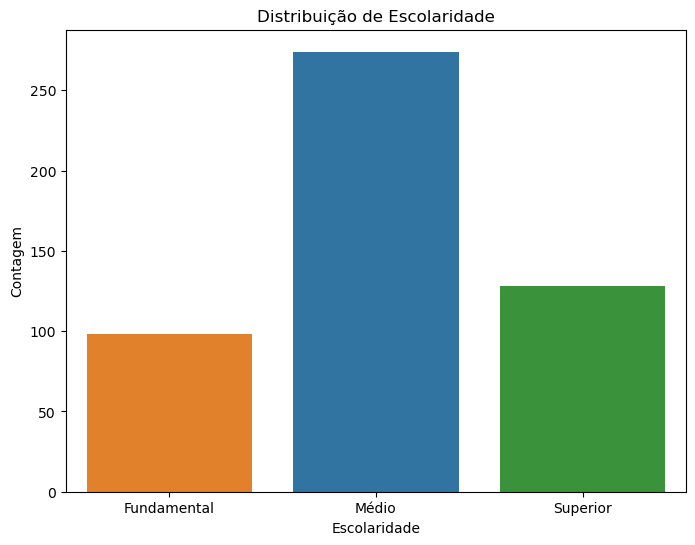

In [28]:
# Distribuição de Escolaridade
cores = ["#1f77b4", "#2ca02c", "#ff7f0e"]
plt.figure(figsize=(8, 6))
sns.countplot(data=df_dados_originais, x='Escolaridade', order=['Fundamental', 'Médio', 'Superior'], 
              hue='Escolaridade', palette=cores, legend=False)
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')

### Correlação Entre Variáveis Quantitativas

In [30]:
# Calculando a matriz de correlação apenas para as variáveis quantitativas
correlation_matrix = df_dados_originais[  ['Idade', 'Salario', 'Score_Exame_Psicotecnico']  ].corr()

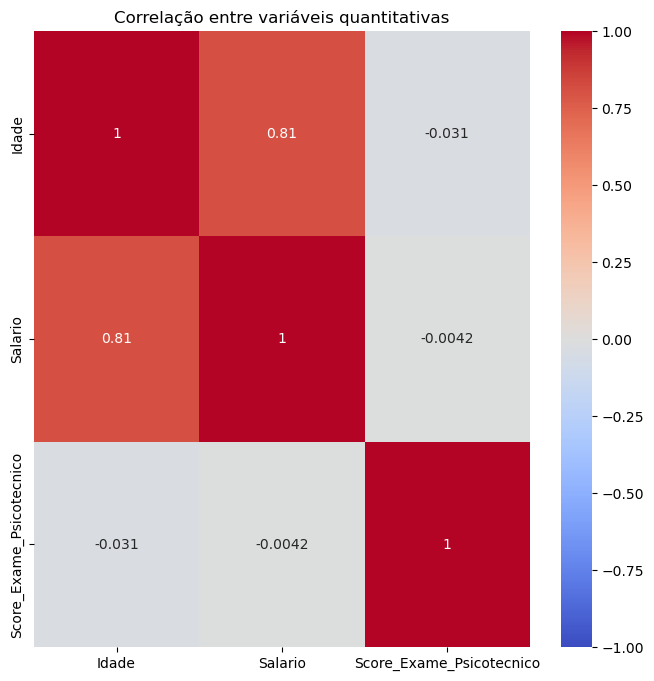

In [32]:
# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

### Associação Entre Variáveis Qualitativas

In [33]:
# Tabela de Contingência
tabela_contingencia = pd.crosstab(df_dados_originais['Genero'], df_dados_originais['Escolaridade'])

In [34]:
print(tabela_contingencia)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


In [35]:
# Carrega a função chi2_contingency
from scipy.stats import chi2_contingency

In [36]:
# Aplica a função chi2_contingency
chi2, p, _, _ = chi2_contingency(tabela_contingencia)

In [50]:
print(f"Valor-p do teste Qui-quadrado: {p:.4f}")

Valor-p do teste Qui-quadrado: 0.8300


>**valor de referência**: se menor que 0,005 existe dependência entre as variáveis. 

>Nesse caso falhamos em rejeitar a H0. **Provavelmente as duas variáveis são independentes uma da outra.**

# Pré-Processamento de Dados

In [39]:
df_dados_originais.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [40]:
duplicadas = df_dados_originais.duplicated()

In [42]:
df_dados_originais[duplicadas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


Não há linhas duplicadas

In [43]:
# Varificamos valores negativos na coluna Salario
df_dados_originais[df_dados_originais['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


In [44]:
# Substituímos valores negativos por NaN (valores ausentes)
df_dados_originais['Salario'] = df_dados_originais['Salario'].apply(lambda x: x if x >= 0 else None)

In [45]:
df_dados_originais[df_dados_originais['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


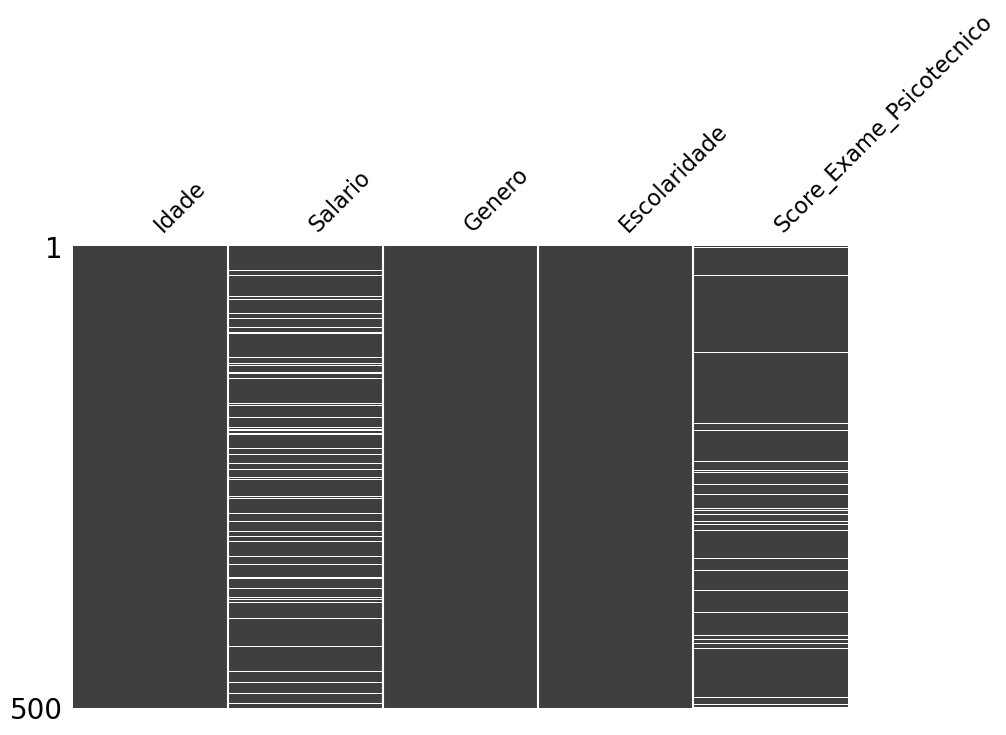

In [47]:
# Mapa de valores ausentes
msno.matrix(df_dados_originais, figsize = (10, 6), sparkline = False)
plt.show()

>Colunas salário e score exame psicotecnico com valores ausentes. **A coluna mais relevante é salário.** 

In [48]:
valores_ausentes = df_dados_originais.isna().sum()

In [49]:
print(valores_ausentes)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [51]:
porcentagem_ausentes = (df_dados_originais.isna().mean() * 100).round(2)

In [52]:
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


### Teste de Normalidade Para Decidir a Estratégia de Tratamento de Valores Ausentes

In [54]:
from scipy import stats

# Extraia a coluna "salario" em uma série
salario = df_dados_originais['Salario']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(salario)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05  # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).")

Estatística de teste: nan
Valor-p: 1.0
Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).


>Dessa forma, podemos considerar utilizar média para preenchimento dos valores ausentes em salário. 

In [59]:
media_salario = df_dados_originais['Salario'].mean()

In [60]:
df_dados_originais['Salario'].fillna(media_salario, inplace = True)

In [61]:
# Usamos o método isna() para verificar valores ausentes em cada coluna
valores_ausentes = df_dados_originais.isna().sum()
print(valores_ausentes)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [62]:
from scipy import stats

# Extraia a coluna "salario" em uma série
score_exame = df_dados_originais['Score_Exame_Psicotecnico']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(score_exame)

# Imprima o resultado do teste
print(f"Estatística de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05  # Nível de significância
if p_valor > alfa:
    print("Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).")
else:
    print("A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).")

Estatística de teste: nan
Valor-p: 1.0
Não há evidências para rejeitar a hipótese nula (os dados parecem seguir uma distribuição normal).


>Vimos que há correlação entre Idade e Salário. Mas se mudarmos a variável Idade para Faixa_Etaria, essa relação se confirma?

In [63]:
df_dados_originais.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [64]:
# Definimos as faixas etárias desejadas em ordem crescente
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]  

In [65]:
# Definimos os rótulos para as faixas etárias
rotulos_faixas = ["Menos de 25", "25-34", "35-44", "45-54", "55 ou mais"]

In [66]:
# Usamos a função pd.cut() para criar a variável de faixa etária
df_dados_originais['Faixa_Etaria'] = pd.cut(df_dados_originais['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [67]:
df_dados_originais.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,58,30404.959339,Masculino,Médio,56.0,55 ou mais
1,48,20886.502401,Feminino,Médio,NaN,45-54
2,34,15959.388748,Masculino,Médio,57.0,25-34
3,62,28534.995327,Outro,Superior,68.0,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.0,25-34


In [68]:
df_dados_originais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  470 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [69]:
# Usamos o método drop() para remover a variável "idade"
df_dados_originais.drop('Idade', axis = 1, inplace = True)

In [70]:
df_dados_originais.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30404.959339,Masculino,Médio,56.0,55 ou mais
1,20886.502401,Feminino,Médio,NaN,45-54
2,15959.388748,Masculino,Médio,57.0,25-34
3,28534.995327,Outro,Superior,68.0,55 ou mais
4,10553.176215,Outro,Fundamental,44.0,25-34


In [71]:
df_dados_originais.describe()

,Salario,Score_Exame_Psicotecnico
count,500.000000,470.000000
mean,21410.761236,61.565957
std,7679.078722,17.662523
min,641.777499,20.000000
25%,15888.869745,48.000000
50%,21410.761236,61.000000
75%,26728.884199,74.000000
max,40845.107626,100.000000


In [78]:
# Média de salário por faixa etária
media_salario_por_faixa_etaria = df_dados_originais.groupby('Faixa_Etaria', observed=False)['Salario'].mean()
media_salario_por_faixa_etaria

Faixa_Etaria
Menos de 25    13108.546536
25-34          14945.150178
35-44          20980.622184
45-54          24736.492690
55 ou mais     29364.334600
Name: Salario, dtype: float64

In [93]:
import warnings


In [94]:
warnings.filterwarnings("ignore")

In [96]:
# Mediana de salário por faixa etária 

mediana_salario_por_faixa_etaria = df_dados_originais.groupby('Faixa_Etaria')['Salario'].median()
mediana_salario_por_faixa_etaria

Faixa_Etaria
Menos de 25    12432.948937
25-34          15387.784406
35-44          21410.761236
45-54          24283.117285
55 ou mais     29345.327349
Name: Salario, dtype: float64

In [97]:
warnings.resetwarnings()

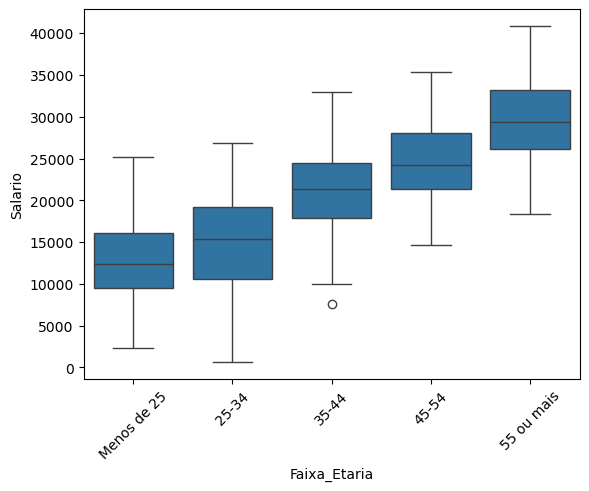

In [85]:
# Boxplots
sns.boxplot(x = 'Faixa_Etaria', y = 'Salario', data = df_dados_originais)
plt.xticks(rotation = 45)
plt.show()

In [88]:
# Teste ANOVA

# Import
import scipy.stats as stats

# Realize um teste de ANOVA para verificar as diferenças nas médias
resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in 
                                   df_dados_originais.groupby('Faixa_Etaria', observed=False)])

# Verifique o resultado do teste
if resultado_anova.pvalue < 0.05:
    print("Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")
else:
    print("Não há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")

Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.


A relação entre idade e salário de fato existe. 

## Relatório Final

Com base em nossa análise observamos que:

- A variável Salario apresentava valores negativos. Como não temos mais detalhes sobre isso, decidimos converter de valor negativo para valor ausente.
- As variáveis Salario e Score_Exame_Psicotecnico apresentavam problemas de valores ausentes.
- Tratamos os valores ausentes com a imputação da média pois as duas variáveis seguem uma distribuição normal.
- Identificamos que não há relação entre as variáveis gênero e escolaridade, ou seja, elas são independentes.
- Verificamos que há relação entre idade e salário, independente do valor individual da idade ou de faixa etária.
- Nossas conclusões e decisões foram baseadas em testes estatísticos.

In [89]:
%watermark -a "Gabriel Delucca"

Author: Gabriel Delucca



In [90]:
%watermark

Last updated: 2023-11-22T02:20:42.121354-03:00

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 12
Architecture: 64bit



In [91]:
%watermark --iversions

missingno : 0.5.2
scipy     : 1.9.1
matplotlib: 3.5.2
numpy     : 1.24.4
seaborn   : 0.13.0
pandas    : 2.1.3



## Fim